# Datasets

This notebook compares the initial datasets (Secbench, Pontas et al, Big Vul and CVE Details) with the final dataset.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from venn import venn

### Research Dataset: SECBENCH

In [2]:
df = pd.read_csv('../commits/secbench.csv')
df.head()

,owner,project,sha,sha-p,year,language,cve_id,cwe_id,score,severity
0,pfsense,pfsense,002bc4ab3268e6e5cb3a01ce73a4c1624d09050a,d6a0379d291f5e98500776618559343f40254e40,2010,php,NaN,CWE-77,NaN,NaN
1,nextcloud,server,0074062b5329c3d43679909fddce2d70608a4475,5c6a7172cafc395d38c58d1b5afd6b36efb33ad5,2012,php,NaN,CWE-79,NaN,NaN
2,nextcloud,server,0241ddc759f7e2d2695c4626df5d2ac27b8b1d90,c2e2c59ca7aa873bd07de04ea701a8b351383aec,2014,php,NaN,CWE-384,NaN,NaN
3,mantisbt,mantisbt,00b4c17088fa56594d85fe46b6c6057bb3421102,b72fdaeb7cb8786401faab520d43092c8bdb44aa,2014,php,CVE-2014-1608,CWE-89,7.5,HIGH
4,splitbrain,dokuwiki,02b0b681935185a1c4d2d64e76fe499f3d438d12,10ffc9dd6a89562ef502baa21f968cf269fe21b0,2006,php,NaN,CWE-79,NaN,NaN


In [3]:
print('number of vulnerabilities:', len(df), '(= number of commits)')
projects = set(['{}/{}'.format(row['owner'], row['project']) for _, row in df[['owner', 'project']].iterrows()])
print('number of projects:', len(projects))
print('number of CVEs:', len(df['cve_id'].unique()))
print('number of vulnerability classes (CWEs):', len(df['cwe_id'].unique()))
print('number of languages:', len(df['language'].unique()))

number of vulnerabilities: 676 (= number of commits)
number of projects: 113
number of CVEs: 189
number of vulnerability classes (CWEs): 51
number of languages: 18


In [4]:
secbench_commits = set([f"https://github.com/{row['owner']}/{row['project']}/{row['sha']}" for _, row in df.iterrows()])

### Research Dataset: Devign

In [5]:
# Devign
df = pd.read_csv('../commits/devign.csv')
df.head()

,sha_id,project
0,59b126f92225316e0cd77bb952d630553801dc85,ffmpeg
1,96e340760824e537e2d034abf9a3b8be3e2b312c,ffmpeg
2,b93d96a07be40f8e5d267d55fe961285586c0fd7,ffmpeg
3,5b4baf1506277863e9c1fa4bd302a4653e859669,ffmpeg
4,51090133b31bc719ea868db15d3ee38e9dbe90f1,ffmpeg


In [6]:
print('number of vulnerabilities:', len(df))
print('number of projects:', len(df['project'].unique()))

number of vulnerabilities: 10894
number of projects: 2


In [7]:
devign_commits = set([f"https://github.com/{row['project']}/{row['project']}/{row['sha_id']}" for _, row in df.iterrows()])

### Research Dataset: SAP

In [8]:
df = pd.read_csv('../commits/sap.csv')
df.head()

,cve_id,project,sha,type,refs,code_refs,commits
0,CVE-2017-4971,https://github.com/spring-projects/spring-webflow,57f2ccb66946943fbf3b3f2165eac1c8eb6b1523,pos,{'https://github.com/spring-projects/spring-we...,{'https://github.com/spring-projects/spring-we...,{'https://github.com/spring-projects/spring-we...
1,CVE-2018-1000134,https://github.com/pingidentity/ldapsdk,8471904a02438c03965d21367890276bc25fa5a6,pos,{'https://github.com/pingidentity/ldapsdk/comm...,{'https://github.com/pingidentity/ldapsdk/comm...,{'https://github.com/pingidentity/ldapsdk/comm...
2,CVE-2016-8749,https://github.com/apache/camel,57d01e2fc8923263df896e9810329ee5b7f9b69,pos,{'https://github.com/apache/camel/commit/57d01...,{'https://github.com/apache/camel/commit/57d01...,{'https://github.com/apache/camel/commit/57d01...
3,CVE-2017-1000393,https://github.com/jenkinsci/jenkins,d7ea3f40efedd50541a57b943d5f7bbed046d091,pos,{'https://github.com/jenkinsci/jenkins/commit/...,{'https://github.com/jenkinsci/jenkins/commit/...,{'https://github.com/jenkinsci/jenkins/commit/...
4,CVE-2018-8034,https://github.com/apache/tomcat,2835bb4e030c1c741ed0847bb3b9c3822e4fbc8a,pos,{'https://github.com/apache/tomcat/commit/2835...,{'https://github.com/apache/tomcat/commit/2835...,{'https://github.com/apache/tomcat/commit/2835...


In [9]:
print('number of commits:', len(df))
print('number of projects:', len(df['project'].unique()))
print('number of CVEs:', len(df['cve_id'].unique()))

number of commits: 1270
number of projects: 198
number of CVEs: 615


In [10]:
sap_commits = set([f"https://github.com/{row['project']}/{row['sha']}" for _, row in df.iterrows()])

### Research Dataset: Big-Vul

In [11]:
df = pd.read_csv('../commits/big_vul.csv')
df.head()

,Unnamed: 0,authentication_required,availability_impact,cve_id,cve_page,cwe_id,access_complexity,confidentiality_impact,integrity_impact,publish_date,...,refs,commit_id,commit_message,files_changed,lang,project,version_after_fix,version_before_fix,code_refs,commits
0,0,Not required,Partial,CVE-2009-1194,https://www.cvedetails.com/cve/CVE-2009-1194/,CWE-189,Medium,Partial,Partial,2009-05-11,...,{'https://github.com/bratsche/pango/commit/4de...,4de30e5500eaeb49f4bf0b7a07f718e149a2ed5e,[glyphstring] Handle overflow with very long g...,"{""sha"": ""8fb70313eb8835dcce812a86209e2a7d88457...",C,pango,4de30e5500eaeb49f4bf0b7a07f718e149a2ed5e,1c9433bfe43890b102c8cead8ab3ee34b44c5c37,{'https://github.com/bratsche/pango/commit/4de...,{'https://github.com/bratsche/pango/commit/4de...
1,1,Not required,Partial,CVE-2010-2809,https://www.cvedetails.com/cve/CVE-2010-2809/,CWE-94,Medium,Partial,Partial,2010-08-19,...,{'https://github.com/Dieterbe/uzbl/commit/9cc3...,9cc39cb5c9396be013b5dc2ba7e4b3eaa647e975,Don't shell-interpret \@SELECTED_URI (fixes FS...,"{""sha"": ""da2c583dc09acf7eb567df6c9c629e61f3c80...",C,uzbl,9cc39cb5c9396be013b5dc2ba7e4b3eaa647e975,afc0f873e873839da75a54e8ca8095d335527786,{'https://github.com/Dieterbe/uzbl/commit/9cc3...,{'https://github.com/Dieterbe/uzbl/commit/9cc3...
2,2,Not required,Partial,CVE-2010-2060,https://www.cvedetails.com/cve/CVE-2010-2060/,NaN,Low,Partial,Partial,2010-06-07,...,{'https://github.com/kr/beanstalkd/commit/2e8e...,2e8e8c6387ecdf5923dfc4d7718d18eba1b0873d,Discard job body bytes if the job is too big.\...,"{""sha"": ""bcfb7d4b22c28d3f909d13dad54b4caa1284f...",C,beanstalkd,2e8e8c6387ecdf5923dfc4d7718d18eba1b0873d,62328a506b8ed24e52c264f073ecbf4e9254f861,{'https://github.com/kr/beanstalkd/commit/2e8e...,{'https://github.com/kr/beanstalkd/commit/2e8e...
3,3,Not required,Partial,CVE-2010-1155,https://www.cvedetails.com/cve/CVE-2010-1155/,CWE-20,Medium,Partial,Partial,2010-04-16,...,{'https://github.com/ensc/irssi-proxy/commit/8...,85bbc05b21678e80423815d2ef1dfe26208491ab,Check if an SSL certificate matches the hostna...,"{""sha"": ""5a9c9bc71553d37a17b89654bec0b6e98b567...",C,irssi-proxy,85bbc05b21678e80423815d2ef1dfe26208491ab,d5688da48306918cdfd79ee9b27abe377204befb,{'https://github.com/ensc/irssi-proxy/commit/8...,{'https://github.com/ensc/irssi-proxy/commit/8...
4,4,Not required,Partial,CVE-2010-1152,https://www.cvedetails.com/cve/CVE-2010-1152/,CWE-20,Low,None,None,2010-04-12,...,{'https://github.com/memcached/memcached/commi...,d9cd01ede97f4145af9781d448c62a3318952719,Use strncmp when checking for large ascii mult...,"{""sha"": ""3e2e9c59e274910dd88af6fbb73006279b5a6...",C,memcached,d9cd01ede97f4145af9781d448c62a3318952719,ea0fec7989ba00cf68326d017fd801a1716f8855,{'https://github.com/memcached/memcached/commi...,{'https://github.com/memcached/memcached/commi...


In [12]:
print('number of CVEs:', len(df['cve_id'].unique()))
print('number of vulnerability classes (CWEs):', len(df['cwe_id'].unique()))

number of CVEs: 3441
number of vulnerability classes (CWEs): 89


In [13]:
bigvul_commits = []
for com in df['commits']:
    bigvul_commits += list(eval(com))
bigvul_commits = set(bigvul_commits)

### Source: NVD

In [14]:
df = pd.read_csv('../commits/nvd.csv')
df.head()

,vuln_id,cwe_id,score,chain,dataset,summary,published_date,chain_len,project,commit_href,commit_sha,patch
0,CVE-2021-20230,NaN,2.9,{'https://github.com/mtrojnar/stunnel/commit/e...,nvd,"A flaw was found in stunnel before 5.57, where...",2021-02-23,1,https://github.com/mtrojnar/stunnel,https://github.com/mtrojnar/stunnel/commit/eba...,ebad9ddc4efb2635f37174c9d800d06206f1edf9,SINGLE
1,CVE-2021-20271,NaN,6.4,{'https://github.com/rpm-software-management/r...,nvd,A flaw was found in RPM's signature check func...,2021-03-26,1,https://github.com/rpm-software-management/rpm,https://github.com/rpm-software-management/rpm...,d6a86b5e69e46cc283b1e06c92343319beb42e21,SINGLE
2,CVE-2021-21234,NaN,2.9,{'https://github.com/lukashinsch/spring-boot-a...,nvd,spring-boot-actuator-logview in a library that...,2021-01-05,2,https://github.com/lukashinsch/spring-boot-act...,https://github.com/lukashinsch/spring-boot-act...,760acbb939a8d1f7d1a7dfcd51ca848eea04e772,MULTI
3,CVE-2021-21234,NaN,2.9,{'https://github.com/lukashinsch/spring-boot-a...,nvd,spring-boot-actuator-logview in a library that...,2021-01-05,2,https://github.com/lukashinsch/spring-boot-act...,https://github.com/lukashinsch/spring-boot-act...,1c76e1ec3588c9f39e1a94bf27b5ff56eb8b17d6,MULTI
4,CVE-2021-21235,NaN,2.9,{'https://github.com/kamadak/exif-rs/commit/f2...,nvd,kamadak-exif is an exif parsing library writte...,2021-01-06,1,https://github.com/kamadak/exif-rs,https://github.com/kamadak/exif-rs/commit/f21d...,f21df24616ea611c5d5d0e0e2f8042eb74d5ff48,SINGLE


In [15]:
print('number of vulnerabilities:', len(df['vuln_id'].unique()))
print('number of commits:', len(df))

number of vulnerabilities: 7061
number of commits: 8097


In [16]:
nvd_commits = set(list(df['commit_href']))

### Source: OSV

In [17]:
df = pd.read_csv('../commits/osv.csv')
df.head()

,vuln_id,cwe_id,score,chain,dataset,summary,published_date,chain_len,project,commit_href,commit_sha,patch
0,GHSA-p6j9-7xhc-rhwp,NaN,NaN,{'https://github.com/medialize/URI.js/commit/a...,osv,Hostname spoofing via backslashes in URL,2021-03-01,1,https://github.com/medialize/URI.js,https://github.com/medialize/URI.js/commit/a1a...,a1ad8bcbc39a4d136d7e252e76e957f3ece70839,SINGLE
1,GHSA-mq5c-prh3-3f3h,NaN,NaN,{'https://github.com/tensorflow/tensorflow/com...,osv,Invalid validation in `QuantizeAndDequantizeV2`,2021-05-21,1,https://github.com/tensorflow/tensorflow,https://github.com/tensorflow/tensorflow/commi...,c5b0d5f8ac19888e46ca14b0e27562e7fbbee9a9,SINGLE
2,GHSA-9v62-24cr-58cx,NaN,NaN,{'https://github.com/sass/node-sass/commit/338...,osv,Denial of Service in node-sass,2020-09-11,1,https://github.com/sass/node-sass,https://github.com/sass/node-sass/commit/338fd...,338fd7a14d3b8bd374a382336df16f9c6792b884,SINGLE
3,GHSA-h6wf-hvwc-fm77,NaN,NaN,{'https://github.com/chakra-core/ChakraCore/co...,osv,Out-of-bounds write,2021-03-29,2,https://github.com/chakra-core/ChakraCore,https://github.com/chakra-core/ChakraCore/comm...,d797e3f00e34c12c8c0ae52f56344325439dccd7,MULTI
4,GHSA-h6wf-hvwc-fm77,NaN,NaN,{'https://github.com/chakra-core/ChakraCore/co...,osv,Out-of-bounds write,2021-03-29,2,https://github.com/chakra-core/ChakraCore,https://github.com/chakra-core/ChakraCore/comm...,d85b5025b047f10784c53c6c1dd771775d417f5f,MULTI


In [18]:
print('number of vulnerabilities:', len(df['vuln_id'].unique()))
print('number of commits:', len(df))

number of vulnerabilities: 3201
number of commits: 4592


In [19]:
osv_commits = set(list(df['commit_href']))

### Source: CVE Details

In [20]:
df = pd.read_csv('../commits/cve_details.csv')
df.head()

,vuln_id,cwe_id,score,chain,summary,dataset,published_date,chain_len,project,commit_href,commit_sha,patch
0,CVE-2008-5619,{'CWE-94'},10.0,{'https://github.com/PHPMailer/PHPMailer/commi...,html2text.php in Chuggnutt HTML to Text Conver...,cve_details,2008-12-17,1,https://github.com/PHPMailer/PHPMailer,https://github.com/PHPMailer/PHPMailer/commit/...,8beacc646acb67c995aea10ac5585970efc7355a,SINGLE
1,CVE-2008-5189,{'CWE-352'},5.0,{'https://github.com/rails/rails/commit/7282ed...,CRLF injection vulnerability in Ruby on Rails ...,cve_details,2008-11-21,1,https://github.com/rails/rails,https://github.com/rails/rails/commit/7282ed86...,7282ed863ca7e6f928bae9162c9a63a98775a19d,SINGLE
2,CVE-2020-35848,{'CWE-89'},7.5,{'https://github.com/agentejo/cockpit/commit/7...,Agentejo Cockpit before 0.11.2 allows NoSQL in...,cve_details,2020-12-30,3,https://github.com/agentejo/cockpit,https://github.com/agentejo/cockpit/commit/79f...,79fc9631ffa29146e3124ceaf99879b92e1ef24b,MULTI
3,CVE-2020-35848,{'CWE-89'},7.5,{'https://github.com/agentejo/cockpit/commit/7...,Agentejo Cockpit before 0.11.2 allows NoSQL in...,cve_details,2020-12-30,3,https://github.com/agentejo/cockpit,https://github.com/agentejo/cockpit/commit/33e...,33e7199575631ba1f74cba6b16b10c820bec59af,MULTI
4,CVE-2020-35848,{'CWE-89'},7.5,{'https://github.com/agentejo/cockpit/commit/7...,Agentejo Cockpit before 0.11.2 allows NoSQL in...,cve_details,2020-12-30,3,https://github.com/agentejo/cockpit,https://github.com/agentejo/cockpit/commit/2a3...,2a385af8d80ed60d40d386ed813c1039db00c466,MULTI


In [21]:
print('number of commits:', len(df))
print('number of CVEs:', len(df['vuln_id'].unique()), '(= number of vulnerabilities)')
print('number of vulnerability classes (CWEs):', len(df['cwe_id'].unique()))

number of commits: 8105
number of CVEs: 7078 (= number of vulnerabilities)
number of vulnerability classes (CWEs): 185


In [22]:
cvedet_commits = set(list(df['commit_href']))

### Venn: Datasets

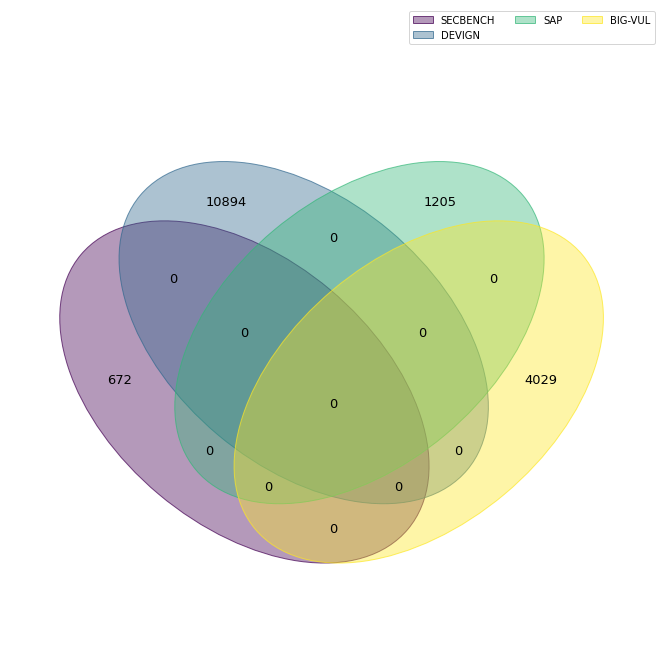

In [23]:
labels = ['SECBENCH', 'DEVIGN', 'SAP', 'BIG-VUL']

sets = {
    labels[0]: secbench_commits,
    labels[1]: devign_commits,
    labels[2]: sap_commits,
    labels[3]: bigvul_commits
}

fig, ax = plt.subplots(1, figsize=(16,12))
venn(sets, ax=ax)
plt.legend(labels, ncol=3)

### Venn: Source

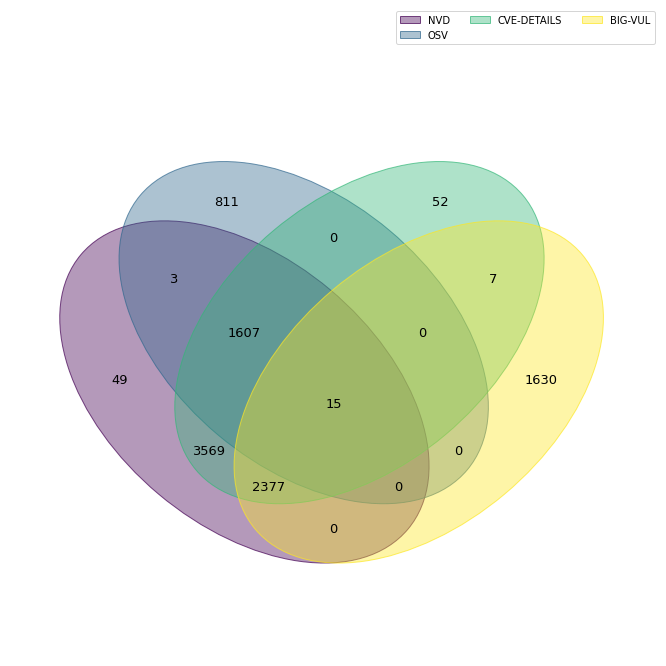

In [24]:
labels = ['NVD', 'OSV', 'CVE-DETAILS', 'BIG-VUL']

sets = {
    labels[0]: nvd_commits,
    labels[1]: osv_commits,
    labels[2]: cvedet_commits,
    labels[3]: bigvul_commits
}

fig, ax = plt.subplots(1, figsize=(16,12))
venn(sets, ax=ax)
plt.legend(labels, ncol=3)

### Intersection of the different research datasets and sources

Text(0.5, 0.98, 'Intersection of the different datasets')

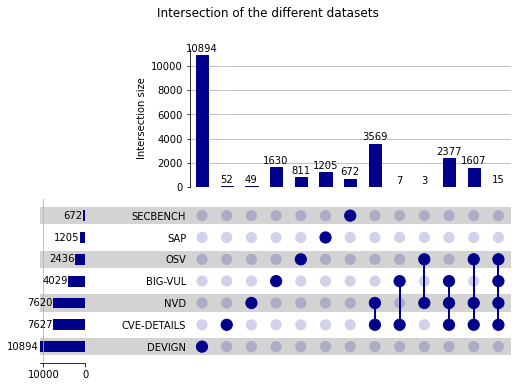

In [25]:
import upsetplot

labels = ['SECBENCH', 'DEVIGN', 'SAP', 'BIG-VUL', 'NVD', 'OSV', 'CVE-DETAILS']

sets = {
    labels[0]: secbench_commits,
    labels[1]: devign_commits,
    labels[2]: sap_commits,
    labels[3]: bigvul_commits,
    labels[4]: nvd_commits,
    labels[5]: osv_commits,
    labels[6]: cvedet_commits,
}

upset_data_sub = upsetplot.from_contents(sets)
upsetplot.plot(upset_data_sub, show_counts=True,facecolor="darkblue", shading_color="lightgray")
plt.suptitle('Intersection of the different datasets')

- `DEVIGN`, `SAP` and `SECBENCH` have unique cases. There is no overlap with any of the other datasets.
- The rest of the research datasets some overlapping between them.